# 5. ВИЗУЕЛИЗАЦИЈА НА ПОДАТОЦИТЕ

(од Томислав Карталов, ФЕИТ, УКИМ, Македонија)

Во ова поглавје, ќе научите да ги **претставувате податоците** во различни визуелни контексти и облици. Потребните алатки се ** Jupyter Notebook** и **Python**.

Визуелизацијата е важна за разбирање на смислата на податоците, преку нивно ставање во визуелен контекст, за да може да се откријат **зависности, трендови и поврзаности** помеѓу феномените кои се опишани.


## 5.1. Креирање и увоезување на податочното множество

Податочното множество можете да се креира рачно, или да се превземе од Интернет, од сервиси како што е [Kaggle](https://www.kaggle.com/datasets). Повеќе за креирањето и менаџирањето со податочните множества може да се прочита во [Поглавје 3 ](https://colab.research.google.com/github/VALENCEML/eBOOK/blob/main/MK/03/3.%20DATA%20SET%20MANAGEMENT-MK.ipynb).

Прво, треба да се уверите дека вашите податоци се организирани во форматот **csv** (вредности одвоени со запирка) и зачувани како датотека локално на вашиот компјутер или достапни преку некој Интернет линк.

За следните примери, ќе го користиме податочното множество [Успех на учениците на тестови](https://www.kaggle.com/datasets/whenamancodes/students-performance-in-exams). Ова податочно множество е на англиски јазиј, меѓутоа, можете слободно да користите и кое било друго податочно множество што ви се допаѓа, или што сте го креирале вие. Во конкретниов случај, датотеката е именувана *exams.csv*.

Следниот код ќе ја увезе библиотеката *pandas* наменета за работа со податочни множества, како и библиотеката *numpy* која содржи математички функции на високо ниво:

In [3]:
import pandas as pd
import numpy as np

Сега, податочното множество може да се увезе и да се прегледа:

In [4]:
Students = pd.read_csv('https://raw.githubusercontent.com/VALENCEML/eBOOK/main/EN/05/exams.csv')
Students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


Понатаму, може да се прегледаат типовите и структурата на податоците во множеството:

In [3]:
Students.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Во продолжение се прикажани две различни библиотеки за визуелизација на податоци, тоа се **seaborn** и **pyplot**. Секоја од нив нуди специфични предности во однос на другата. Општо земено, *pyplot* се користи за правење основни графикони кои се состојат од линиски зависности (plots), пити (pie-charts), столбови (bars) итн., додека *seaborn* користи шаблонско претставување на податоците со веќе испрограмирани функции на повисоко ниво. Синтаксата на *pyplot* е нешто посложена, но за сметка на тоа нуди повеќе слобода и приспособливост во изработката на визуелизациите.

## 5.2. Библиотеката „seaborn“

Библиотеката „seaborn“ е одлична при вршење истражувања, кога се прави статистичка анализа на податочни множества. Еве еден можен начин за увезување на библиотеката и поставување на палетите на бои кои ќе бидат користени при визуелизациите:

In [4]:
import seaborn as sbn
sbn.set(color_codes=True)

Сега, можеме да го анализираме податочното множество и да генерираме статистички параметри за една, две или повеќе категории. На почеток, нешто едноставно, како на пример родова распределба на учениците:

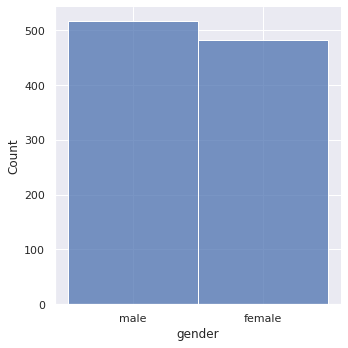

In [5]:
sbn.displot(Students['gender'])        

*Вежба*: пробај други категории наместо полот!

Добар пример за биваријатна статистика е визуелната корелација помеѓу резултатите на тестовите за читање и пишување. Таа може да се добие со помош на:

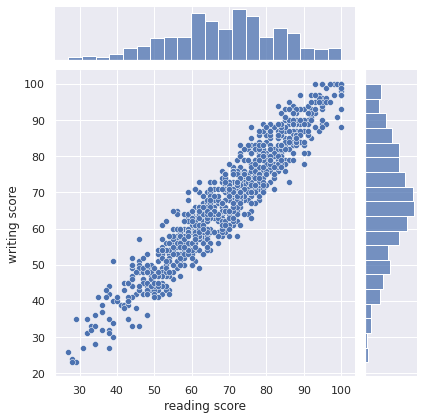

In [6]:
sbn.jointplot(data=Students, x="reading score", y="writing score")

*Вежба*: обидете се да замените една од категориите со резултатот од тестовите по математика! Можете ли да го забележите слабеењето на корелацијата? Можете ли да го објасните?

Боењето на податочните точки, исто така, може да се направи зависно од некои од податочните параметри, на тој начин потенцирајќи важни сознанија. На пример, влијанието на посетувањето на подготвителен курс врз исходот од испитите може да се визуелизира со:

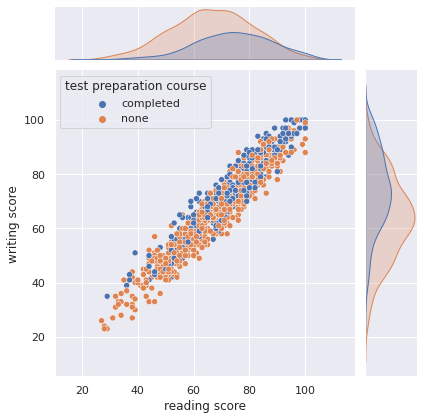

In [7]:
sbn.jointplot(data=Students, x="reading score", y="writing score", hue = 'test preparation course')


*Вежба*: набљудувајте го влијанието на некои други категории, пол, раса, степен на образование на родителите... дали можете да забележите некоја статистичка важност?

Ако не сме сигурни кои категории во податочното множество се во меѓусебна корелација, функцијата *pairplot* е одличен начин за автоматско генерирање графици кои ги упаруваат релевантните категории во множеството:

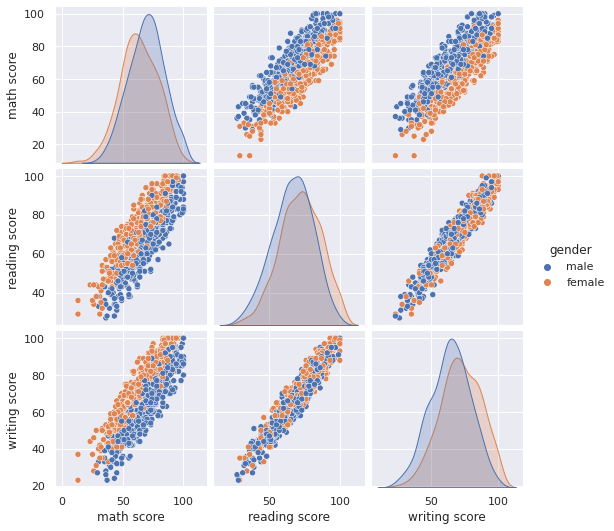

In [8]:
sbn.pairplot(Students, hue='gender')

Ова создава мрежа од графици кои ги испитуваат биваријатните односи помеѓу секој пар параметри. Графиците во главната дијагонала се униваријатни дистрибутивни графици.

Исто така, можно е да се реорганизира мрежата, да се прикаже подмножество од категориите или да се исцртаат различни променливи на редовите и колоните:

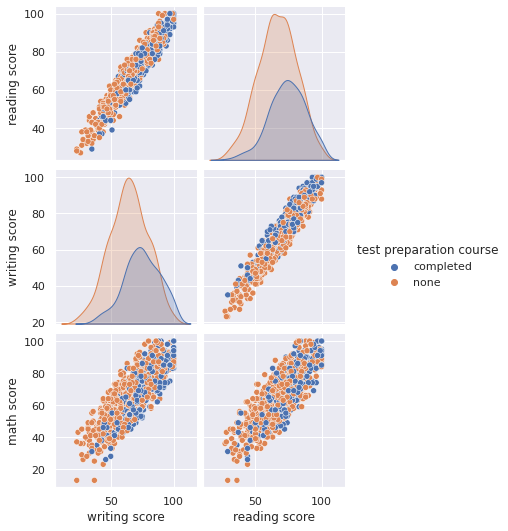

In [9]:
sbn.pairplot(Students,x_vars=['writing score','reading score'],y_vars=['reading score','writing score','math score'],hue='test preparation course')

*Понатамошни вежби*: експериментирајте со други функции за визуелизација од [seaborn](https://seaborn.pydata.org/index.html), на пр. stripplot, boxplot, barplot, countplot ..

## 5.3. Библиотеката „pyplot“

Pyplot е модул од пакетот **matplotlib**, моќна графичка библиотека на Python и NumPy. Обезбедува објектно ориентиран API (апликативен програмски интерфејс) за цртање графици и нивно вградување во апликации. Иако со pyplot може да се  добијат слични податочни визуелизации како со seaborn, синтаксата за нивно добивање е нешто посложена. Seaborn има имплементирано некои функции од повисоко ниво за статистичка анализа, додека pyplot овозможува поголема слобода кон деталите и поширока контрола врз параметрите на графиците.
Библиотеката може да се увезе на следниот начин:

In [1]:
from matplotlib import pyplot as plt

Во случајов, освен pyplot, ќе треба да се увезат и библиотеките pandas и numpy, како и податочното множество *Students* (видете го почетокот на ова предавање).
Да почнеме од истата анализа на родовата распределба на учениците:

<BarContainer object of 2 artists>

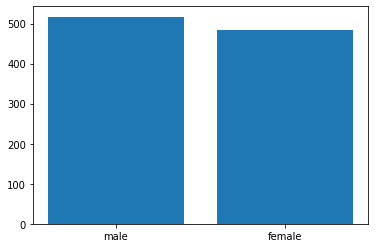

In [5]:
counts = Students.gender.value_counts()
plt.bar(["male","female"],counts)

Забележете како графиконот е донекаде сличен на оној добиен со библиотеката seaborn, меѓутоа, процесот на негово генерирање е сосема поинаков. Seaborn ги извршува чекорите за броење и именување на колоните автоматски, додека овде, експлицитно наведуваме што сакаме да содржи графикот. Последново одзема малку повеќе време, но ни дава поголема контрола и можности за прилагодување.
Ајде да се обидеме да ги ставиме истите податоци во поинаков тип на графикон:

([<matplotlib.patches.Wedge at 0x7ff1945f6520>,
 [Text(-0.05871992619937442, 1.0984315956249346, 'male'),
  Text(0.058720029041962135, -1.0984315901271737, 'female')])

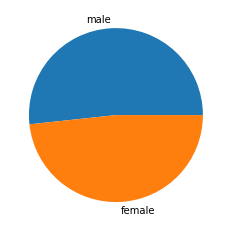

In [6]:
plt.pie(counts, labels =["male","female"] )


*Понатамошни вежби*: експериментирајте со широката палета на параметри за визуелизација, како што се *explode*, *colors*, *shadow*, *startangle* итн. Можете да прочитате за правилната синтакса овде [matplotlib.pyplot.pie](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html)

Сега да се обидеме да реплицираме биваријатна статистика, визуелна корелација помеѓу резултатите од тестовите за читање и пишување:

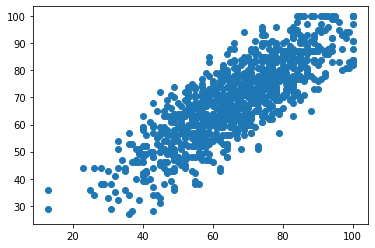

In [7]:
plt.scatter(Students['math score'],Students['reading score'])


Овој графикон ја претставува основната форма на податоците. Можеме да додадеме малку „шминка“ и да го направиме повеќе информативен:

Text(0, 0.5, 'reading')

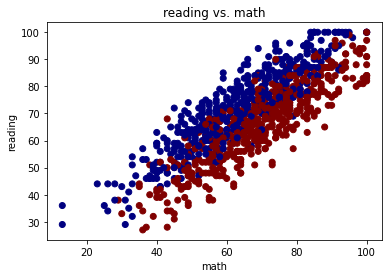

In [8]:
plt.scatter(Students['math score'],Students['reading score'],c=Students['gender']=="male",cmap='jet')
plt.title("reading vs. math")
plt.xlabel("math")
plt.ylabel("reading")

*Вежба*: обидете се да ставите различни податоци во графиконот (пишување, читање, математика). Играјте со боите. Можете да прочитате за правилната синтакса овде [matplotlib.pyplot.scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)

Еден важен аспект на визулализацијата на податоците се **линиските графикони**. Тие се многу користени за да претставуваат континуирани податоци и да се разберат нивните модели и трендови. Pyplot е особено моќна алатка за цртање и прилагодување на линиски графикони. За да го илустрираме ова, ќе увеземе друг сет на податоци: [World Population 1960-2018](https://www.kaggle.com/datasets/imdevskp/world-population-19602018?select=population_total_long.csv).
(проверете дали датотеката *csv* е преземена на вашиот компјутер).

In [9]:
Population = pd.read_csv('https://raw.githubusercontent.com/VALENCEML/eBOOK/main/EN/05/population_total_long.csv')
Population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12595 entries, 0 to 12594
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CountryName  12595 non-null  object
 1   Year         12595 non-null  int64 
 2   Count        12595 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 295.3+ KB


Да се обидеме да го исцртаме бројот на населението во Македонија низ годините. За тоа, прво, треба да ги изолираме податоците за Македонија од податоците за другите земји:

In [10]:
Macedonia = Population[Population.CountryName == 'Macedonia']

На графикот, хоризонталната оска треба да бидат годините, а вертикалната оска бројот на населението.

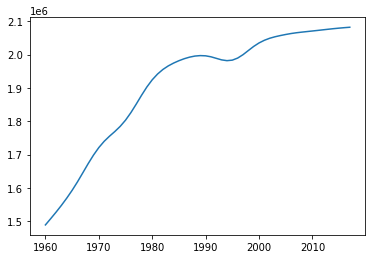

In [11]:
plt.plot(Macedonia.Year, Macedonia.Count)

Note the 1e6 number above the left upper corner of the chart. That number shows that the numbers denoted on the vertical axis should be multiplied by that factor. If we want to show the numbers already converted in millions, then the following could be executed:

Забележете го бројот 1e6 над горниот лев агол на табелата. Тој број покажува дека бројките означени на вертикалната оска треба да се помножат со тој фактор. Ако сакаме да ги прикажеме веќе конвертираните бројки во милиони, тогаш може да се изврши следново:

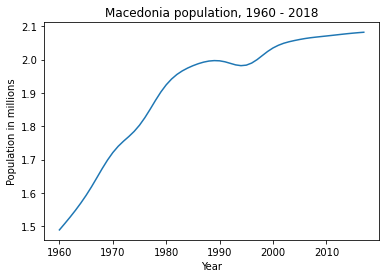

In [12]:
plt.plot(Macedonia.Year, Macedonia.Count / 10**6)
plt.title("Macedonia population, 1960 - 2018")
plt.xlabel("Year")
plt.ylabel("Population in millions")
plt.show()

*Вежба*: обидете се да ги нацртате податоците за вашата земја или за некоја друга земја во светот. Имињата на земјите вклучени во податоците може да се видат ако ги отворите податоците за преглед, или можете директно да ја отворите зачуваната CSV-датотека.

Сега, ајде да се обидеме да го споредиме бројот на населението во Македонија и Словенија низ годините (не заборавајте прво да ги изолирате податоците):

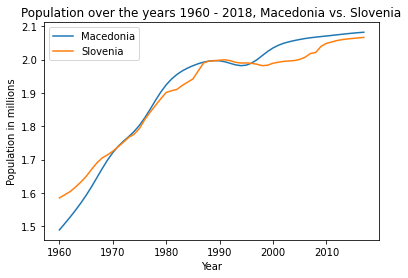

In [13]:
Slovenia = Population[Population.CountryName == 'Slovenia']
plt.plot(Macedonia.Year, Macedonia.Count / 10**6)
plt.plot(Slovenia.Year, Slovenia.Count / 10**6)
plt.title("Population over the years 1960 - 2018, Macedonia vs. Slovenia")
plt.xlabel("Year")
plt.ylabel("Population in millions")
plt.legend(["Macedonia","Slovenia"])
plt.show()

Да ја додадеме и Србија во графикот:

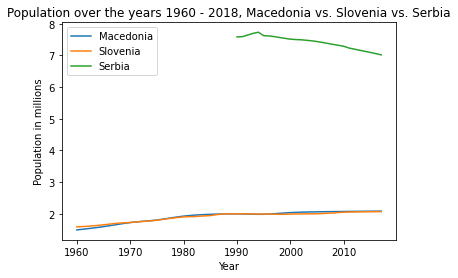

In [14]:
Serbia = Population[Population.CountryName == 'Serbia']
plt.plot(Macedonia.Year, Macedonia.Count / 10**6)
plt.plot(Slovenia.Year, Slovenia.Count / 10**6)
plt.plot(Serbia.Year, Serbia.Count / 10**6)
plt.title("Population over the years 1960 - 2018, Macedonia vs. Slovenia vs. Serbia")
plt.xlabel("Year")
plt.ylabel("Population in millions")
plt.legend(["Macedonia","Slovenia", "Serbia"])
plt.show()

Можеме да видиме дека податоците за Србија се нецелосни и започнуваат дури во 1990 година. За да се прикаже само опсегот каде што се достапни податоците за сите три земји, можеме да ја ограничиме хоризонталната оска:

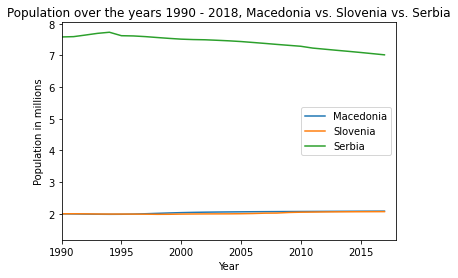

In [15]:
plt.plot(Macedonia.Year, Macedonia.Count / 10**6)
plt.plot(Slovenia.Year, Slovenia.Count / 10**6)
plt.plot(Serbia.Year, Serbia.Count / 10**6)
plt.xlim([1990,2018])
plt.title("Population over the years 1990 - 2018, Macedonia vs. Slovenia vs. Serbia")
plt.xlabel("Year")
plt.ylabel("Population in millions")
plt.legend(["Macedonia","Slovenia", "Serbia"])
plt.show()

Забележете како легендата беше автоматски преместена на друга локација, за да не се меша со линиите.

Апсолутниот број на популации прикажани на истиот графикон ги прави линиите за Македонија и Словенија многу блиску една до друга, бидејќи и двете се мали во споредба со населението во Србија. Сепак, можеби поинформативен графикон би бил релативниот раст на населението со текот на годините. За да ги направиме податоците релативни, треба да поставиме референтна популација. Да речеме дека населението од 1990 година ќе ни биде референца и ќе му доделиме 100% вредност на тој број. Потоа, за секоја година населението ќе се пресметува процентуално во однос на референцата.

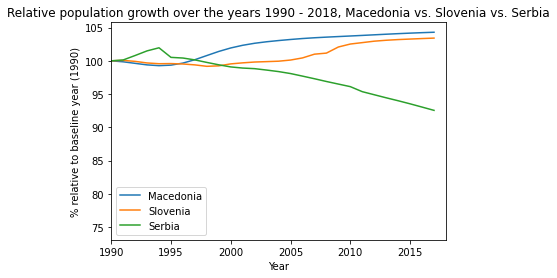

In [17]:
MacReference = float(Macedonia.Count[Macedonia.Year == 1990])     # casting to float, in order to use for calculations
SloReference = float(Slovenia.Count[Slovenia.Year == 1990])
SerReference = float(Serbia.Count[Serbia.Year == 1990])

MacRelative = pd.to_numeric(Macedonia.Count,errors='coerce') / MacReference  # Note how a series of data is cast into float
SloRelative = pd.to_numeric(Slovenia.Count,errors='coerce') / SloReference 
SerRelative = pd.to_numeric(Serbia.Count,errors='coerce') / SerReference 

plt.plot(Macedonia.Year, MacRelative * 100)    # multiply by 100 to make it percentage
plt.plot(Slovenia.Year, SloRelative * 100)
plt.plot(Serbia.Year, SerRelative * 100)
plt.xlim([1990,2018])
plt.title("Relative population growth over the years 1990 - 2018, Macedonia vs. Slovenia vs. Serbia")
plt.xlabel("Year")
plt.ylabel("% relative to baseline year (1990)")
plt.legend(["Macedonia","Slovenia", "Serbia"])
plt.show()

*Вежби и понатамошно читање*:
- Обидете се да ги промените боите на линиите за да одговараат на боите на националните спортски тимови од трите земји (Македонија: црвена, Словенија: зелена, Србија: сина).
- Обидете се да ја ограничите вертикалната оска на соодветниот дел од табелата.
- Експериментирајте со стилови на линии (цврсти, испрекинати, точки...) и маркери (круг, триаголник, ѕвезда...)

Документацијата за правилната синтакса може да се најде овде [matplotlib.pyplot.plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)
